In [1]:

import math

import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from matplotlib import pyplot as plt
from datetime import datetime as dt
from pandas.plotting import autocorrelation_plot


<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

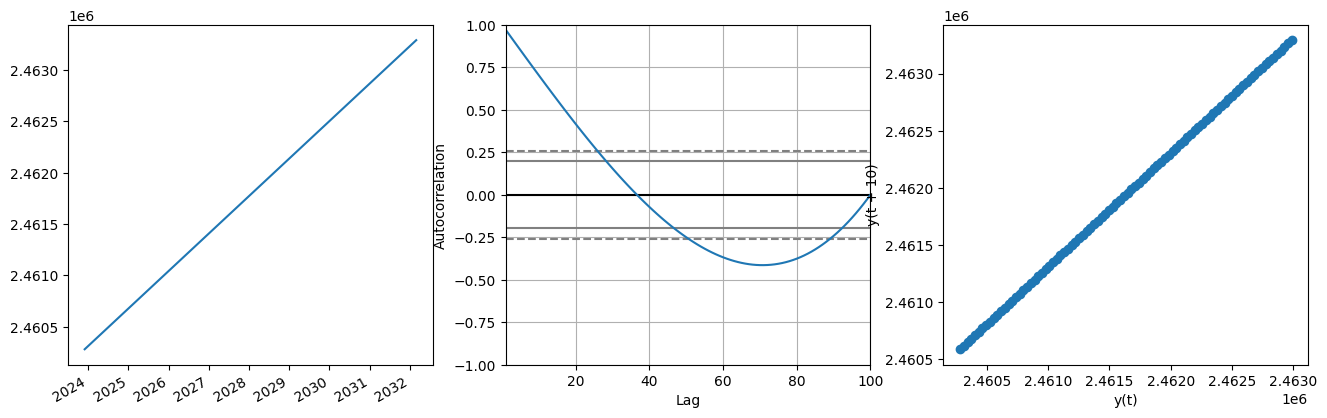

In [2]:
index = pd.date_range(dt.now(), periods=100, freq="M")
data = index.to_series().apply(lambda x: x.to_julian_date())
ser = pd.Series(data=data, index=index)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
ser.plot()
plt.subplot(1,3,2)
autocorrelation_plot(ser)
plt.subplot(1,3,3)
lag_plot(ser, lag=10)


<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

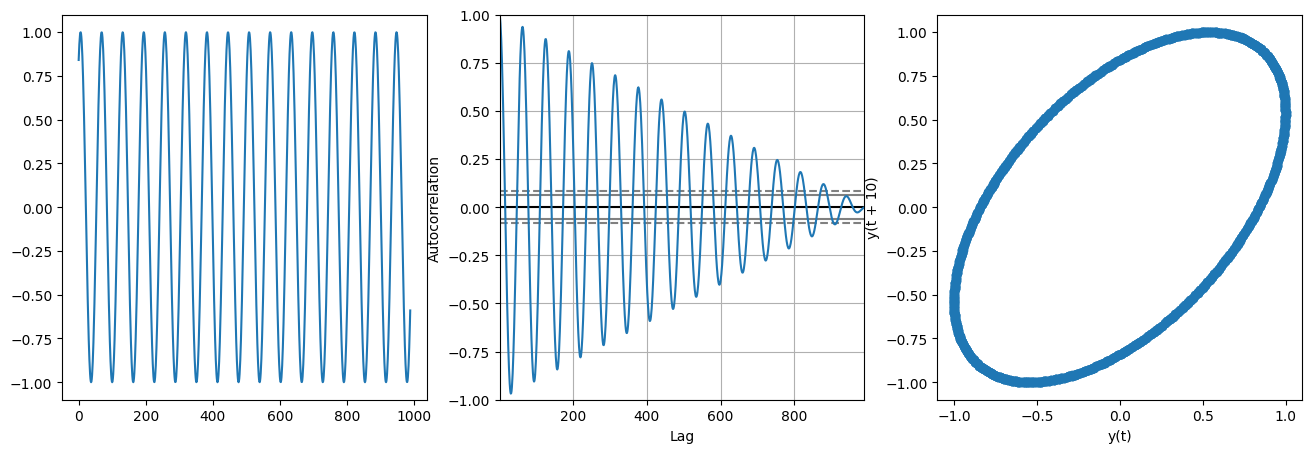

In [3]:
x = np.arange(1, 100, 0.1)
ser = pd.Series(x).apply(lambda x:math.sin(x))
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
ser.plot()
plt.subplot(1,3,2)
autocorrelation_plot(ser)
plt.subplot(1,3,3)
lag_plot(ser, lag=10)


<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

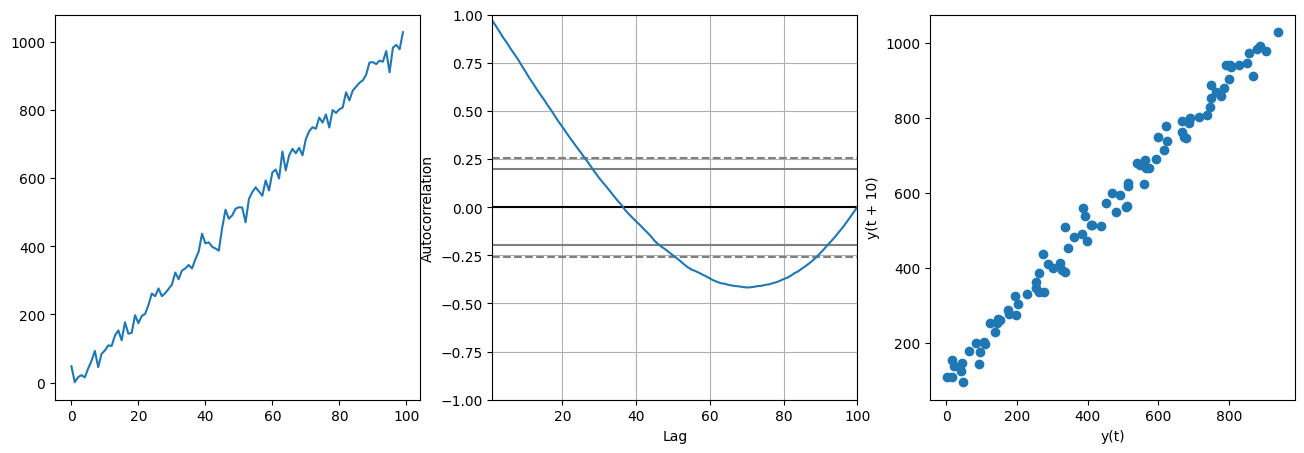

In [4]:
x = np.random.randn(100)*20
ser = pd.Series(np.linspace(1,1000, 100)+x)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
ser.plot()
plt.subplot(1,3,2)
autocorrelation_plot(ser)
plt.subplot(1,3,3)
lag_plot(ser, lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

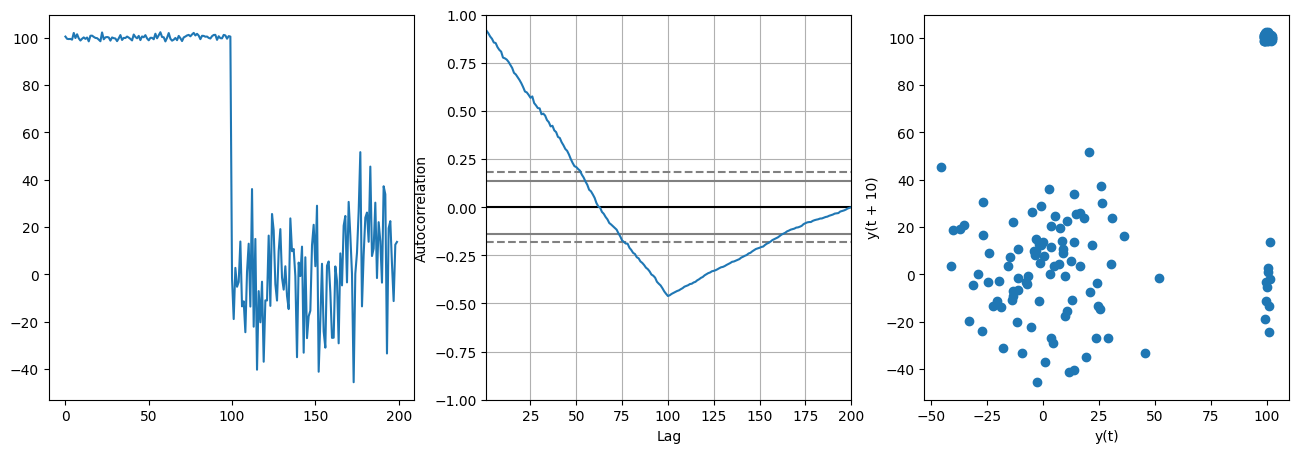

In [5]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)*20
x = np.concatenate([x1+100,x2])
ser = pd.Series(x)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
ser.plot()
plt.subplot(1,3,2)
autocorrelation_plot(ser)
plt.subplot(1,3,3)
lag_plot(ser, lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

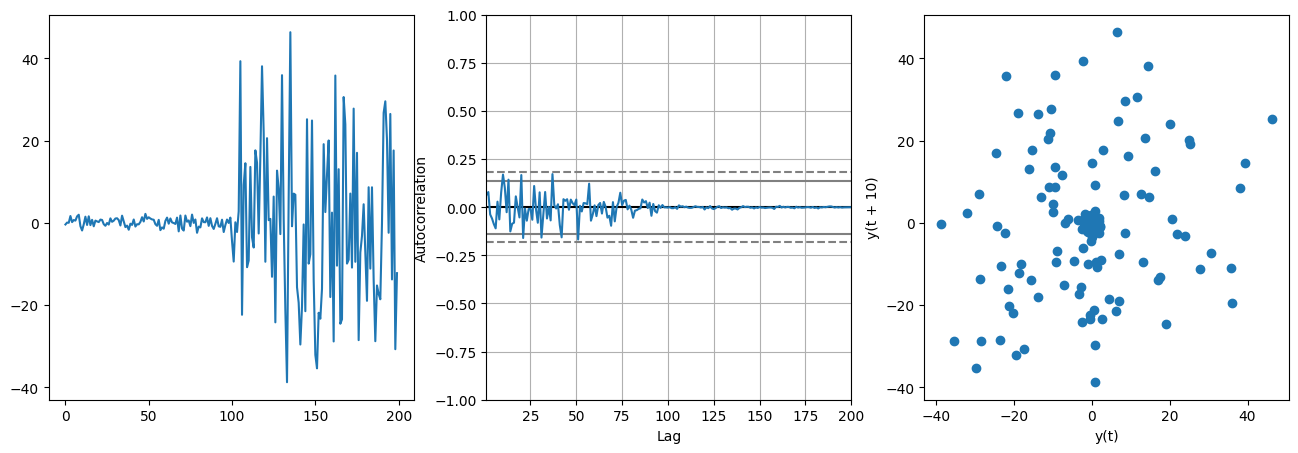

In [6]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)*20
x = np.concatenate([x1,x2])
ser = pd.Series(x)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
ser.plot()
plt.subplot(1,3,2)
autocorrelation_plot(ser)
plt.subplot(1,3,3)
lag_plot(ser, lag=10)